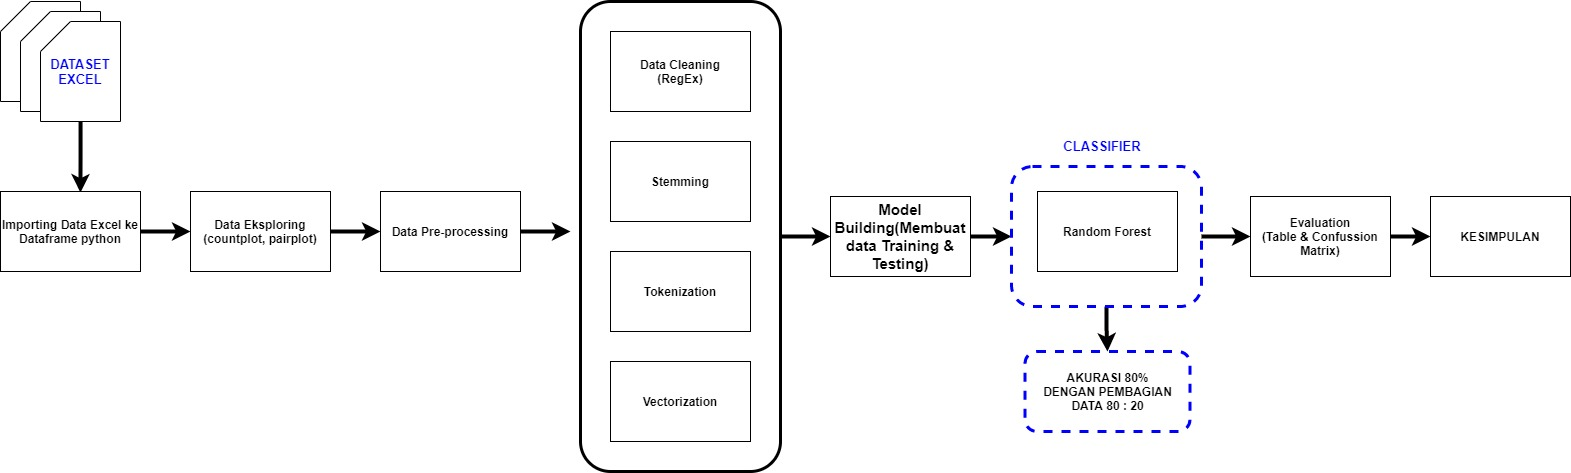

# 1. IMPORTING LIBRARIES

In [137]:
import numpy as np 
import pandas as pd 
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline    
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics

# 2. LOADING/ EKSTRAKSI DATA

In [138]:
#Menggunakan GoogleColab
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_excel(io.BytesIO(uploaded['1000 data dongeng (3).xlsx']), header=None)
#Pembacaan 1000 data dongeng

df.info()

#Menggunakan JupyterNotebook
#df = pd.read_excel('1000 data dongeng (3).xlsx', header=None)
#df

Saving 1000 data dongeng (3).xlsx to 1000 data dongeng (3) (5).xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


### 2.1 Mengganti header menjadi "teks" sebagai input dan "kategori" sebagai output

In [139]:
df.rename(columns = {0 : 'teks', 1 : 'kategori'}, inplace = True)

### 2.2 Memeriksa apakah ada data yang bernilai Nol/ Null

In [140]:
df.isnull().sum()

teks        0
kategori    0
dtype: int64

In [141]:
df

,teks,kategori
0,"Ketika kedua kalinya sang ibu menghampirinya, ...",marah
1,Pangeran Empang Kuala murka mendengar pinangan...,marah
2,Bujang Kelana akan menantang Pendekar Katung u...,marah
3,Pendekar Katung yang tidak terima dengan kekal...,marah
4,Ibunya sangat marah. ‘’ Dasar bodoh! Baju kesa...,marah
...,...,...
995,"Akan tetapi, ia dan rombongan terkejut sebab d...",terkejut
996,"Mendengar hal itu, Halimah sangat kaget dan te...",terkejut
997,Ketika aku memperhatikan domba-domba yang seda...,terkejut
998,Pada suatu hari beliau duduk di gua Hira dan t...,terkejut


### 2.3 Menampilkan jumlah data pada masing-masing kelas

In [142]:
df["kategori"].value_counts()

senang      278
sedih       194
terkejut    183
marah       161
takut       136
jijik        48
Name: kategori, dtype: int64

### 2.4 Menampilkan jumlah data pada masing-masing kelas kedalam bentuk grafik

Text(0, 0.5, 'Jumlah Data')

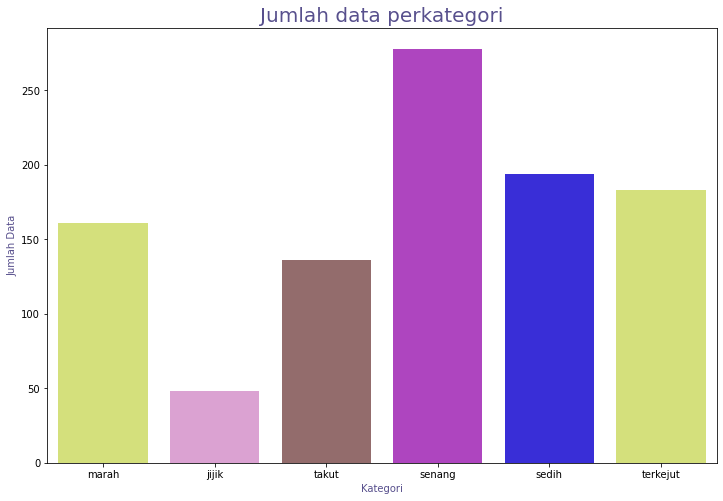

In [143]:
cols= ["#E1F16B", "#E598D8", "#996666", "#BC31D3", "#2112F3"] 
plt.figure(figsize=(12,8))
fg = sns.countplot(x = df["kategori"], palette= cols)
fg.set_title("Jumlah data perkategori", color="#58508d", fontsize=20)
fg.set_xlabel("Kategori", color="#58508d")
fg.set_ylabel("Jumlah Data", color="#58508d")

In [144]:
data=df.copy() 

### 2.5 Menambahkan kolom untuk informasi jumlah karakter, kata dan kalimat pada setiap kalimat dongeng

In [145]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [146]:
data["No_of_Characters"] = data["teks"].apply(len)
data["No_of_Words"]=data.apply(lambda row: nltk.word_tokenize(row["teks"]), axis=1).apply(len)
data["No_of_sentence"]=data.apply(lambda row: nltk.sent_tokenize(row["teks"]), axis=1).apply(len)

data.describe().T

,count,mean,std,min,25%,50%,75%,max
No_of_Characters,1000.0,86.306,36.188617,24.0,60.75,80.0,106.0,293.0
No_of_Words,1000.0,14.370,6.062496,4.0,10.00,13.0,17.0,52.0
No_of_sentence,1000.0,1.281,0.590243,1.0,1.00,1.0,1.0,5.0


# 3. DATA PREPROCESSING

In [147]:
print("\033[1m\u001b[45;1m 5 Kalimat sebelum proses cleaning:\033[0m",*data["teks"][:5], sep = "\n") #print text setelah diextract

 5 Kalimat sebelum proses cleaning:
Ketika kedua kalinya sang ibu menghampirinya, Sang Putri justru membentak ibunya.
Pangeran Empang Kuala murka mendengar pinangannya ditolak.
Bujang Kelana akan menantang Pendekar Katung untuk menyabung ayam.
Pendekar Katung yang tidak terima dengan kekalahannya memerintahkan pengawalnya untuk mengejar Bujang Kelana.
Ibunya sangat marah. ‘’ Dasar bodoh! Baju kesayanganku itu harganya sangat mahal.


Split Data

In [148]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, 0].values
y = df.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)
len(y_train)

800

### 3.1 Defining fungsi untuk cleaning teks

In [149]:
def Clean(Text):
    dongeng = re.sub('[^a-zA-Z]', ' ', Text) #menghilangkan karakter selain alfabet
    dongeng = dongeng.lower() #membuat semua alfabet menjadi huruf kecil
    dongeng = dongeng.split() 
    dongeng = ' '.join(dongeng) 
    return dongeng

data["clean_text"] = data["teks"].apply(Clean) #mengimplementasikan fungsi Clean kedalam dataframe

print("\033[1m\u001b[45;1m Teks Setelah Cleaning:\033[0m",*data["clean_text"][:5], sep = "\n") #menampilkan 5 data teratas yang sudah di cleaning

 Teks Setelah Cleaning:
ketika kedua kalinya sang ibu menghampirinya sang putri justru membentak ibunya
pangeran empang kuala murka mendengar pinangannya ditolak
bujang kelana akan menantang pendekar katung untuk menyabung ayam
pendekar katung yang tidak terima dengan kekalahannya memerintahkan pengawalnya untuk mengejar bujang kelana
ibunya sangat marah dasar bodoh baju kesayanganku itu harganya sangat mahal


### Instalasi modul Sastrawi untuk proses Stemming bahasa Indonesia

Proses Stemming dilakukan untuk mengeneralisasi arti dari setiap kata menjadi bentuk baku nya.
contoh: "Menghampirinya", menjadi bentuk "Hampir"

Selain Stemming, dapat juga dilakukan proses Lemmatization.
keduanya memiliki fungsi yang sama.

namun proses Lemmatization tidak efektif pada kasus ini, karena data yang berupa bahasa Indonesia,
sedangkan library yang sering digunakan untuk proses Lemmatization masih kurang mengakomodir bahasa Indonesia.

In [150]:
!pip install Sastrawi 

### 3.2 Proses Stemming

In [151]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

text = [row['teks'] for index,row in data.iterrows()]
data["Stemmed_Text"] = list(map(stemmer.stem, text))
print("\033[1m\u001b[45;1m Teks setelah Stemming:\033[0m",*data["Stemmed_Text"][:5], sep = "\n")

 Teks setelah Stemming:
ketika dua kali sang ibu hampir sang putri justru bentak ibu
pangeran empang kuala murka dengar pinang tolak
bujang kelana akan tantang pendekar katung untuk sabung ayam
pendekar katung yang tidak terima dengan kalah perintah awal untuk kejar bujang kelana
ibu sangat marah dasar bodoh baju sayang itu harga sangat mahal


### 3.3 Proses Tokenisasi

Proses Tokenisasi dilakukan untuk mencacah kalimat menjadi per-kata.

In [152]:
data["Tokenize_Text"]=data.apply(lambda row: nltk.word_tokenize(row["clean_text"]), axis=1)

print("\033[1m\u001b[45;1m Teks Setelah Tokenisasi:\033[0m",*data["Tokenize_Text"][:5], sep = "\n")

 Teks Setelah Tokenisasi:
['ketika', 'kedua', 'kalinya', 'sang', 'ibu', 'menghampirinya', 'sang', 'putri', 'justru', 'membentak', 'ibunya']
['pangeran', 'empang', 'kuala', 'murka', 'mendengar', 'pinangannya', 'ditolak']
['bujang', 'kelana', 'akan', 'menantang', 'pendekar', 'katung', 'untuk', 'menyabung', 'ayam']
['pendekar', 'katung', 'yang', 'tidak', 'terima', 'dengan', 'kekalahannya', 'memerintahkan', 'pengawalnya', 'untuk', 'mengejar', 'bujang', 'kelana']
['ibunya', 'sangat', 'marah', 'dasar', 'bodoh', 'baju', 'kesayanganku', 'itu', 'harganya', 'sangat', 'mahal']


In [153]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### 3.4 Menghilangkan Stopwords pada data

Stopwords adalah kata yang kurang bermakna atau tidak mempengaruhi proses klasifikasi.
Contoh: Adalah, itu, ini, dan sebagainya.

In [154]:
# Removing the stopwords function
def remove_stopwords(text):
    stop_words = set(stopwords.words("indonesian"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

data["Nostopword_Text"] = data["Tokenize_Text"].apply(remove_stopwords)

print("\033[1m\u001b[45;1m Teks setelah removal stopwords:\033[0m",*data["Nostopword_Text"][:5], sep = "\n")

 Teks setelah removal stopwords:
['kalinya', 'sang', 'menghampirinya', 'sang', 'putri', 'membentak', 'ibunya']
['pangeran', 'empang', 'kuala', 'murka', 'mendengar', 'pinangannya', 'ditolak']
['bujang', 'kelana', 'menantang', 'pendekar', 'katung', 'menyabung', 'ayam']
['pendekar', 'katung', 'terima', 'kekalahannya', 'memerintahkan', 'pengawalnya', 'mengejar', 'bujang', 'kelana']
['ibunya', 'marah', 'dasar', 'bodoh', 'baju', 'kesayanganku', 'harganya', 'mahal']


### 3.5 Mengekstraksi data linguistik (data corpus) untuk proses vektorisasi

In [155]:
corpus= []
for i in data["Nostopword_Text"]:
    dng = ' '.join([row for row in i])
    corpus.append(dng)

corpus[:5]
print("\033[1m\u001b[45;1m teks corpus :\033[0m",*corpus[:5], sep = "\n")

 teks corpus :
kalinya sang menghampirinya sang putri membentak ibunya
pangeran empang kuala murka mendengar pinangannya ditolak
bujang kelana menantang pendekar katung menyabung ayam
pendekar katung terima kekalahannya memerintahkan pengawalnya mengejar bujang kelana
ibunya marah dasar bodoh baju kesayanganku harganya mahal


### 3.6 Proses Vektorisasi menggunakan metode TF-IDF

TF-IDF merupakan singkatan dari Term Frequency — Inverse Document Frequency adalah metode algoritma yang berguna untuk menghitung bobot setiap kata yang umum digunakan. Metode ini akan menghitung nilai Term Frequency (TF) dan Inverse Document Frequency (IDF) pada setiap token (kata) di setiap dokumen dalam korpus.

In [156]:
#Mengubah data teks menjadi angka
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()
X.dtype

dtype('float64')

### 3.7 Menampilkan rata-rata frekuensi kemunculan setiap kata

In [157]:
term = tfidf.get_feature_names()

# sum tfidf frequency of each term through documents
sums = X.sum(axis=0)

# connecting term to its sums frequency
data1 = []
for col, term in enumerate(term):
    data1.append((term, sums[col] ))

ranking = pd.DataFrame(data1, columns=['kata','frekuensi'])
ranking.sort_values('frekuensi', ascending=False)

,kata,frekuensi
1823,raja,25.379814
2161,terkejut,20.506804
1926,sedih,19.727177
1894,sang,18.642571
1315,mendengar,17.987894
...,...,...
1705,penyesalan,0.220115
23,aka,0.220115
2290,untung,0.220115
813,karuniai,0.219807


In [161]:
y=data["kategori"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [162]:
y_test

679       sedih
977    terkejut
450      senang
617      senang
143       marah
         ...   
920    terkejut
301       takut
349      senang
58        marah
212       takut
Name: kategori, Length: 200, dtype: object

In [163]:
cls = RandomForestClassifier()
cls.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [164]:
# Crossvalidation 
cv_score = cross_val_score(cls, X_train,y_train,scoring="accuracy", cv=10)
print("%s: %f " % ("Random Forest", cv_score.mean()))

Random Forest: 0.800000 


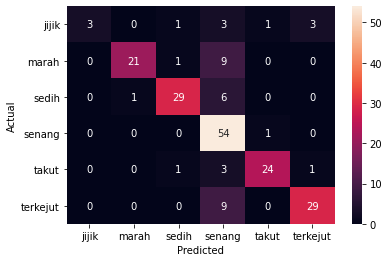

In [165]:
import seaborn as sn

y_pred = cls.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [168]:
#Penyimpanan data train 
data1 = df_train.to_csv(r'D:\'Data_Dongeng_train.csv')

In [169]:
#Penyimpanan data test
data2= df_test.to_csv(r'D:\'Data_Dongeng_test.csv')

In [170]:
cls.fit(X_train,y_train)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       jijik       0.27      1.00      0.43         3
       marah       0.68      0.95      0.79        22
       sedih       0.81      0.91      0.85        32
      senang       0.98      0.64      0.78        84
       takut       0.83      0.92      0.87        26
    terkejut       0.76      0.88      0.82        33

    accuracy                           0.80       200
   macro avg       0.72      0.88      0.76       200
weighted avg       0.85      0.80      0.80       200



# Kesimpulan

1. Hasil pengklasifikasian perasaan dari test dongeng menggunakan algoritma RandomForest cukup baik.
2. Hasil akurasi dapat berubah tergantung pada pesebaran data training dan testing dengan rata-rata hasil akurasi 80%
3. Tahap preprocessing data pada percobaan ini sangat berpengaruh terhadap hasil akurasi.
4. Proses Stemming pada kasus ini lebih baik dari pada lemmatisasi karena library Bahasa Indonesia tidak cukup banyak.

# Referensi

1. https://www.kaggle.com/vanshjatana/text-classification-from-scratch
2. https://www.kaggle.com/ash316/eda-to-prediction-dietanic
3. https://www.kaggle.com/sagarkhambad/text-classification
4. https://www.kaggle.com/madz2000/text-classification-using-keras-nb-97-accuracy
5. https://www.kaggle.com/selener/multi-class-text-classification-tfidf
6. https://www.kaggle.com/selener/multi-class-text-classification-tfidf
7. https://www.kaggle.com/kevinastudillo/twitter-covid-sentiment-analysis